In [117]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageOps

In [2]:
def first_and_last_nonzeros(arr):
    for i in range(len(arr)):
        if arr[i] != 0:
            break
    left = i
    for i in reversed(range(len(arr))):
        if arr[i] != 0:
            break
    right = i
    assert left < right
    return left, right

In [61]:
def crop(filename, padding: int = 8):
    image = Image.open(filename).convert("L")
    arr = np.array(image)
    row_sums = np.sum(arr, axis=1)
    col_sums = np.sum(arr, axis=0)
    y_start, y_end = first_and_last_nonzeros(row_sums)
    x_start, x_end = first_and_last_nonzeros(col_sums)
    cropped = arr[y_start:y_end+1, x_start:x_end+1]
    H, W = cropped.shape
    new_arr = np.zeros((H + padding * 2, W + padding * 2))
    new_arr[padding:H+padding, padding:W+padding] = cropped
    new_image = Image.fromarray(new_arr)
    return new_image

In [62]:
filename = "../data/formula_images/1a0a0dfbac.png"
cropped_image = crop(filename)

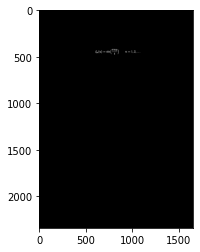

In [96]:
image = Image.open(filename).convert("L")
arr = 255 - np.array(image)
row_sums = np.sum(arr, axis=1)
col_sums = np.sum(arr, axis=0)
plt.imshow(arr, cmap="gray")

In [95]:
y_start, y_end = first_and_last_nonzeros(row_sums)
x_start, x_end = first_and_last_nonzeros(col_sums)
cropped = arr[y_start:y_end+1, x_start:x_end+1]
H, W = cropped.shape
padding = 8
new_arr = np.zeros((H + padding * 2, W + padding * 2))
new_arr[padding:H+padding, padding:W+padding] = cropped
plt.imshow(new_arr, cmap="gray")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [71]:
print(np.min(new_arr), np.max(new_arr))

0.0 15.0


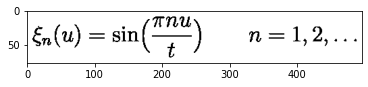

In [114]:
new_image = Image.fromarray(255 - new_arr)
plt.imshow(new_image, cmap="gray")

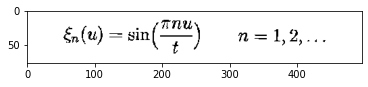

In [182]:
transform = transforms.Compose([
    transforms.RandomAffine(
        degrees=(-2, 2),
        scale=(0.6, 1.0),
        shear=(-5, 5),
        fill=255,
    ),
    transforms.GaussianBlur(kernel_size=1),
])
plt.imshow(transform(new_image), cmap="gray")

In [7]:
import image_to_latex.data.utils as utils
from pathlib import Path

all_formulas = utils.get_all_formulas("../data/im2latex_formulas.norm.lst")
_, train_formulas = utils.get_split(
    all_formulas, Path("../data/im2latex_test_filter.lst")
)
lengths = [len(formula) for formula in train_formulas]

In [10]:
import pandas as pd

pd.DataFrame({"length": lengths}).describe(percentiles=[0.95])

,length
count,10355.000000
mean,64.849445
std,41.922425
min,0.000000
50%,55.000000
95%,138.000000
max,625.000000
